In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
#reading dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [116]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'Height')

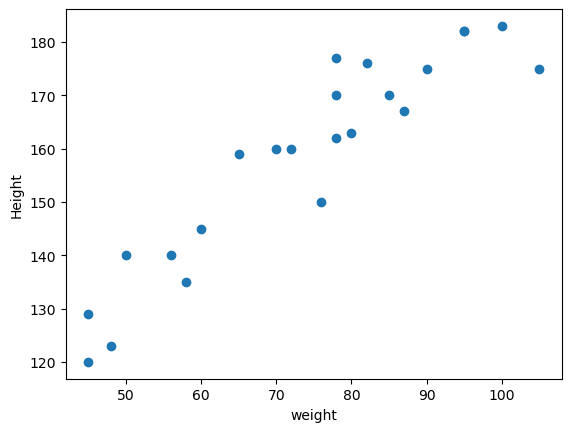

In [117]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('Height')

In [118]:
#independent and dependent feature
x=df[['Weight']]#indepenedent feature
y=df.iloc[:,1]#dependent feature

In [119]:
x.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [120]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [121]:
#train gtest split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [122]:
x_train.shape

(18, 1)

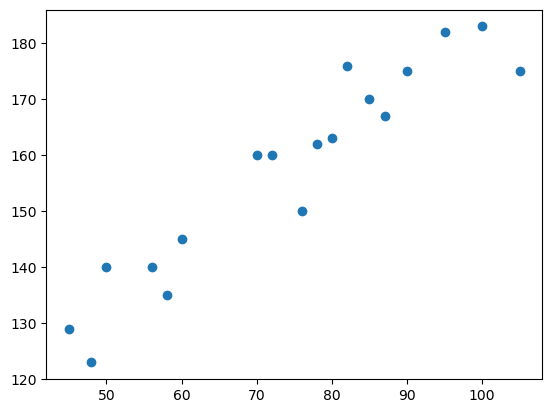

In [123]:
plt.scatter(x_train,y_train)

In [124]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

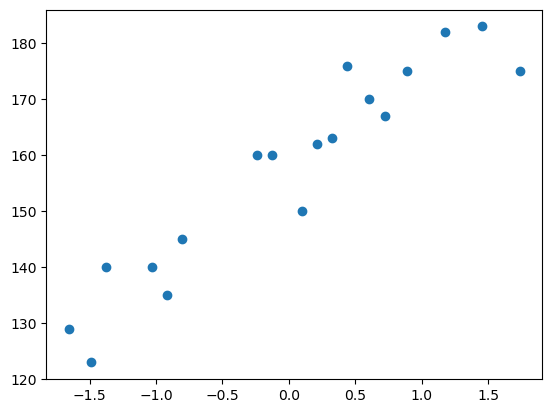

In [125]:
plt.scatter(x_train,y_train)

In [126]:
#train the simple linear regression
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [127]:
linReg.coef_

array([17.03440872])

In [128]:
linReg.intercept_

157.5

In [129]:

y_pred=linReg.predict(x_test)
y_test,y_pred

(15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64,
 array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]))

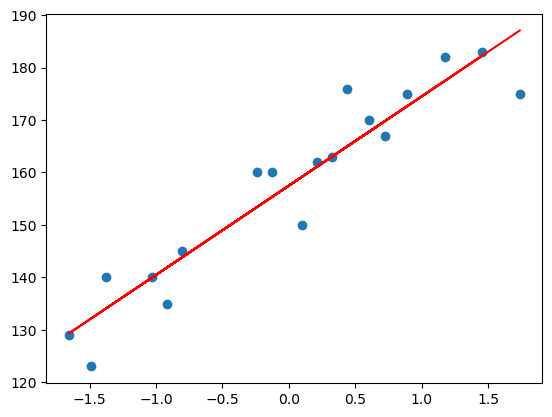

In [130]:
plt.scatter(x_train,y_train)
plt.plot(x_train,linReg.predict(x_train),c='r')

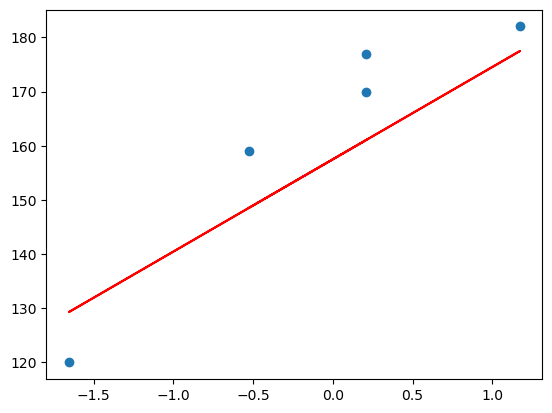

In [131]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,c='r')

In [133]:
##Performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print("mean absolute error ",mae)
print("mean square error ",mse)
print("root mean square error ",rmse)

mean absolute error  9.822657814519227
mean square error  109.77592599051654
root mean square error  10.477400726827076


In [135]:
#rsquare
score=r2_score(y_test,y_pred)
score

0.7769869860423441

In [137]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231254

In [140]:
#prediction fro new data
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [141]:
linReg.predict(scaled_weight)

array([163.01076266])

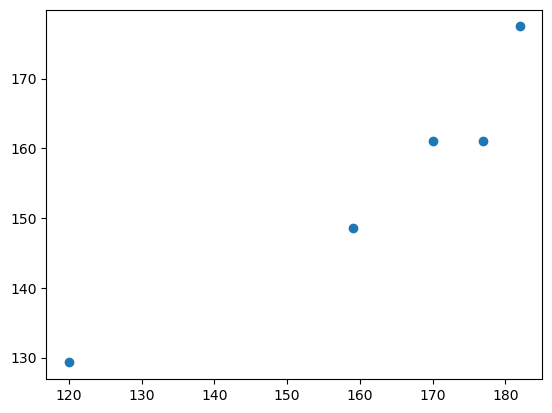

In [142]:
#assumptions
# plt between y_test and y Pred (if it is linear than the model is good)
plt.scatter(y_test,y_pred)

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25124\185056177.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


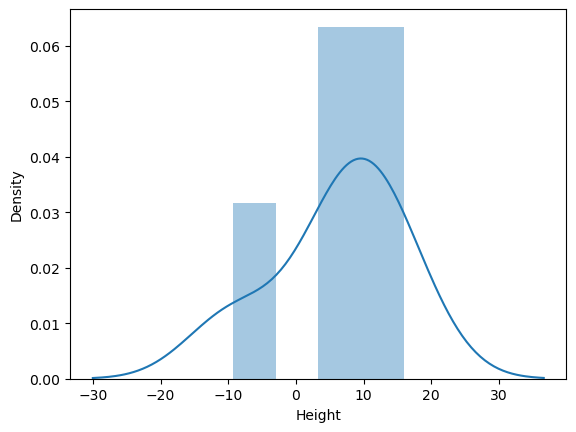

In [150]:
#residuals
residuals=y_test-y_pred
print(residuals)
# when we plot the residuals  if it is normal distribution than model is good
sns.distplot(residuals,kde=True)
plt.show()


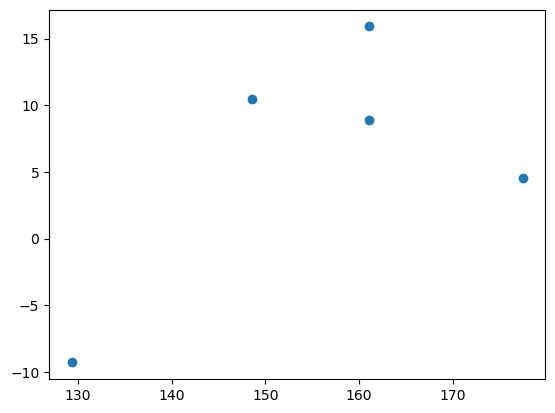

In [151]:
#plotting y_pred an d rsiduals if it s uniformly distributed than model is good
plt.scatter(y_pred,residuals)